# 全体のバグ発見数
バグ発見，null, timeoutの数を数える

## cpNum = [1, 50, 99]の時

========結果（tree値別）========

--- tree=0 ---
testCase: 1800
バグ発見数: 875 : 48.61%
Null発見数: 843 : 46.83%
Timeout発見数: 82 : 4.56%

--- tree=500 ---
testCase: 1800
バグ発見数: 914 : 50.78%
Null発見数: 833 : 46.28%
Timeout発見数: 53 : 2.94%

--- tree=1000 ---
testCase: 1800
バグ発見数: 922 : 51.22%
Null発見数: 830 : 46.11%
Timeout発見数: 48 : 2.67%

========結果（全体合計）========
testCase: 5400
バグ発見数: 2711 : 50.20%
Null発見数: 2506 : 46.41%
Timeout発見数: 183 : 3.39%


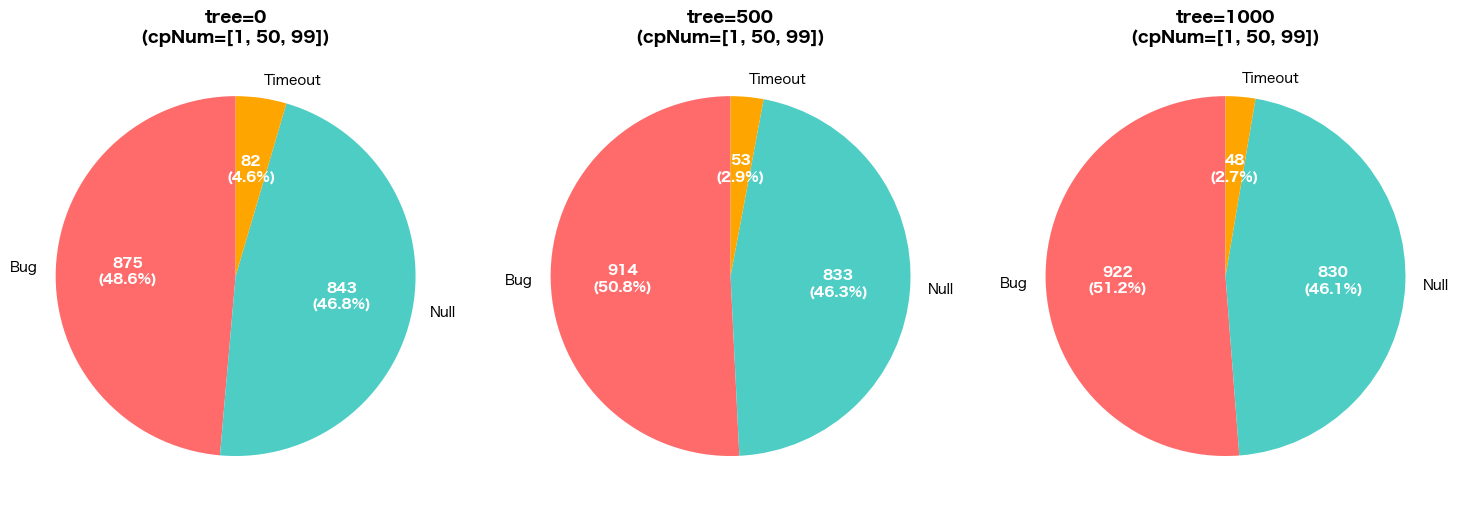

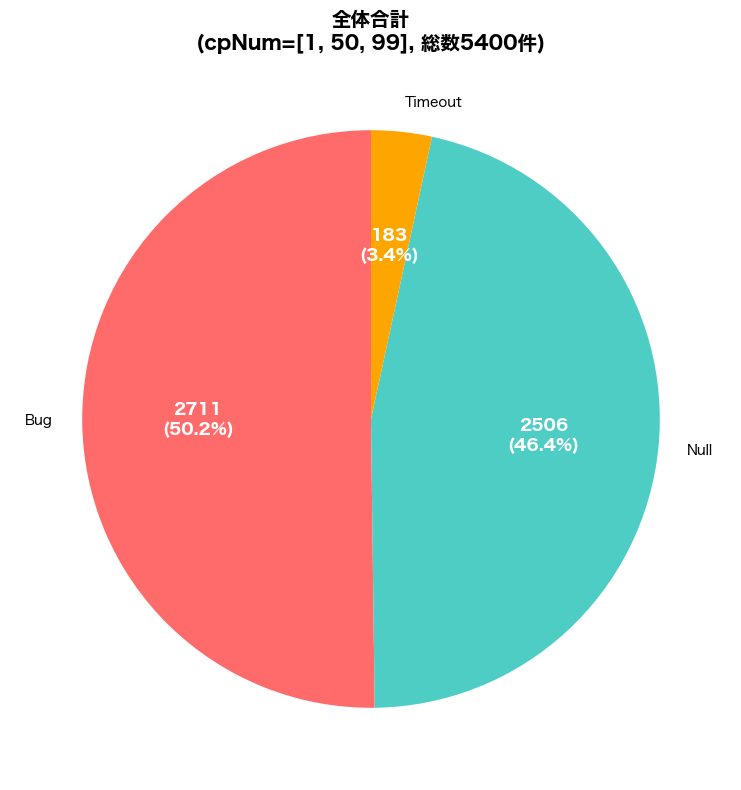

In [ ]:
from collections import defaultdict

import csv

created_prams = []

Num_params = [ 1, 50, 99 ]
range_params = [ 1, 50, 99 ]
tree_values = [0, 500, 1000]  # treeパラメータの値

# treeごとの結果を格納する辞書
tree_results = {}

# 各tree値に対して集計
for tree in tree_values:
    detected_bugs = 0
    detected_null = 0
    detected_timeout = 0
    
    # cpNum1 ~ 10 の時
    for idx in range(10):
        cpNum = [0] * 10
        cpNum_range = [0] * 10
        cpNum_dir = [1] * 10
        temp = cpNum + cpNum_range + cpNum_dir
        
        for Range in range(3):
            for Dir in range(1, 5):
                for Num in range(len(Num_params)):
                    result_dict = defaultdict(int)
                    cpNum[idx] = Num_params[Num]
                    cpNum_range[idx] = range_params[Range]
                    cpNum_dir[idx] = Dir
                    resultDirectoryName = ",".join(map(str, cpNum + cpNum_range + cpNum_dir))
                    
                    # treeディレクトリを含むパスを指定
                    with open(f"Logs/tree={tree}/{resultDirectoryName}/detected_bugs.csv", "r") as csvfile:
                        reader = csv.reader(csvfile)
                        for row in reader:
                            if row == ["null"]:
                                detected_null += 1
                            elif row == ["timeout"]:
                                detected_timeout += 1
                            else:
                                detected_bugs += 1
    
    tree_results[tree] = {
        'bugs': detected_bugs,
        'null': detected_null,
        'timeout': detected_timeout
    }

# 結果を表示
print("========結果（tree値別）========")
for tree, results in tree_results.items():
    testCase = results['bugs'] + results['null'] + results['timeout']
    print(f"\n--- tree={tree} ---")
    print(f"testCase: {testCase}")
    print(f"バグ発見数: {results['bugs']} : {results['bugs'] / testCase * 100:.2f}%")
    print(f"Null発見数: {results['null']} : {results['null'] / testCase * 100:.2f}%")
    print(f"Timeout発見数: {results['timeout']} : {results['timeout'] / testCase * 100:.2f}%")

# 全体の合計
print("\n========結果（全体合計）========")
total_bugs = sum(r['bugs'] for r in tree_results.values())
total_null = sum(r['null'] for r in tree_results.values())
total_timeout = sum(r['timeout'] for r in tree_results.values())
total_cases = total_bugs + total_null + total_timeout
print(f"testCase: {total_cases}")
print(f"バグ発見数: {total_bugs} : {total_bugs / total_cases * 100:.2f}%")
print(f"Null発見数: {total_null} : {total_null / total_cases * 100:.2f}%")
print(f"Timeout発見数: {total_timeout} : {total_timeout / total_cases * 100:.2f}%")

# 円グラフの作成
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#ff6b6b', '#4ecdc4', '#ffa500']  # Bug: 赤, Null: 水色, Timeout: オレンジ
labels = ['Bug', 'Null', 'Timeout']

for idx, tree in enumerate(tree_values):
    results = tree_results[tree]
    sizes = [results['bugs'], results['null'], results['timeout']]
    
    # パーセンテージの計算
    total = sum(sizes)
    
    # カスタムautopct関数：数値とパーセンテージを表示
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{val}\n({pct:.1f}%)'
        return my_autopct
    
    # 円グラフの作成
    wedges, texts, autotexts = axes[idx].pie(
        sizes, 
        labels=labels, 
        colors=colors,
        autopct=make_autopct(sizes),
        startangle=90
    )
    
    # タイトルの設定
    axes[idx].set_title(f'tree={tree}\n(cpNum=[1, 50, 99])', fontsize=12, fontweight='bold')
    
    # テキストのスタイル調整
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# 全体合計の円グラフ
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
colors = ['#ff6b6b', '#4ecdc4', '#ffa500']  # Bug: 赤, Null: 水色, Timeout: オレンジ
sizes = [total_bugs, total_null, total_timeout]

# カスタムautopct関数：数値とパーセンテージを表示
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}\n({pct:.1f}%)'
    return my_autopct

# 円グラフの作成
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors,
    autopct=make_autopct(sizes),
    startangle=90
)

# タイトルの設定
ax.set_title(f'全体合計\n(cpNum=[1, 50, 99], 総数{total_cases}件)', fontsize=14, fontweight='bold')

# テキストのスタイル調整
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

## cpNum = [1, 50, 99, 200, 300, 700]の時

========結果（tree値別）========

--- tree=0 ---
testCase: 3600
バグ発見数: 2002 : 55.61%
Null発見数: 1318 : 36.61%
Timeout発見数: 280 : 7.78%

--- tree=500 ---
testCase: 3600
バグ発見数: 2129 : 59.14%
Null発見数: 1311 : 36.42%
Timeout発見数: 160 : 4.44%

--- tree=1000 ---
testCase: 3600
バグ発見数: 2092 : 58.11%
Null発見数: 1324 : 36.78%
Timeout発見数: 184 : 5.11%

========結果（全体合計）========
testCase: 10800
バグ発見数: 6223 : 57.62%
Null発見数: 3953 : 36.60%
Timeout発見数: 624 : 5.78%


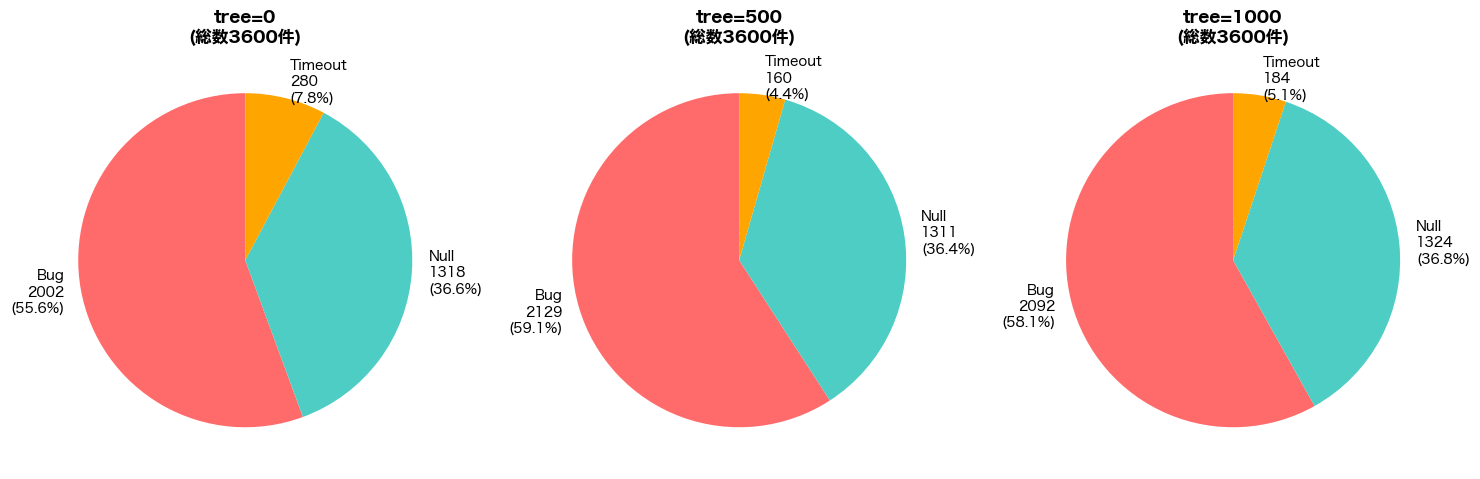

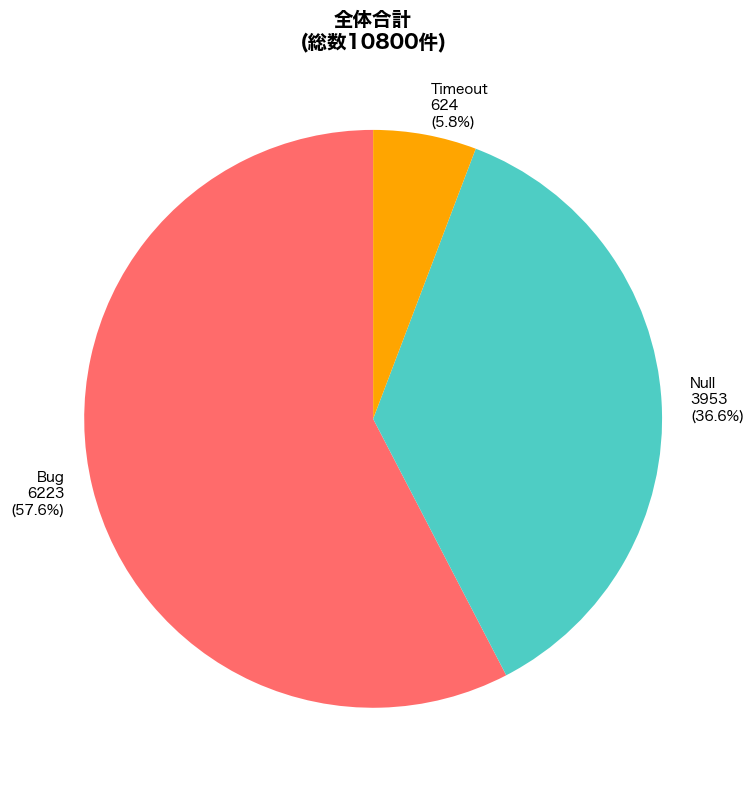

In [4]:
from collections import defaultdict

import csv

created_prams = []

Num_params = [ 1, 50, 99, 200, 300, 700 ]
range_params = [ 1, 50, 99 ]
tree_values = [0, 500, 1000]  # treeパラメータの値

# treeごとの結果を格納する辞書
tree_results = {}

# 各tree値に対して集計
for tree in tree_values:
    detected_bugs = 0
    detected_null = 0
    detected_timeout = 0
    
    # cpNum1 ~ 10 の時
    for idx in range(10):
        cpNum = [0] * 10
        cpNum_range = [0] * 10
        cpNum_dir = [1] * 10
        temp = cpNum + cpNum_range + cpNum_dir
        
        for Range in range(3):
            for Dir in range(1, 5):
                for Num in range(len(Num_params)):
                    result_dict = defaultdict(int)
                    cpNum[idx] = Num_params[Num]
                    cpNum_range[idx] = range_params[Range]
                    cpNum_dir[idx] = Dir
                    resultDirectoryName = ",".join(map(str, cpNum + cpNum_range + cpNum_dir))
                    
                    # treeディレクトリを含むパスを指定
                    with open(f"Logs/tree={tree}/{resultDirectoryName}/detected_bugs.csv", "r") as csvfile:
                        reader = csv.reader(csvfile)
                        for row in reader:
                            if row == ["null"]:
                                detected_null += 1
                            elif row == ["timeout"]:
                                detected_timeout += 1
                            else:
                                detected_bugs += 1
    
    tree_results[tree] = {
        'bugs': detected_bugs,
        'null': detected_null,
        'timeout': detected_timeout
    }

# 結果を表示
print("========結果（tree値別）========")
for tree, results in tree_results.items():
    testCase = results['bugs'] + results['null'] + results['timeout']
    print(f"\n--- tree={tree} ---")
    print(f"testCase: {testCase}")
    print(f"バグ発見数: {results['bugs']} : {results['bugs'] / testCase * 100:.2f}%")
    print(f"Null発見数: {results['null']} : {results['null'] / testCase * 100:.2f}%")
    print(f"Timeout発見数: {results['timeout']} : {results['timeout'] / testCase * 100:.2f}%")

# 全体の合計
print("\n========結果（全体合計）========")
total_bugs = sum(r['bugs'] for r in tree_results.values())
total_null = sum(r['null'] for r in tree_results.values())
total_timeout = sum(r['timeout'] for r in tree_results.values())
total_cases = total_bugs + total_null + total_timeout
print(f"testCase: {total_cases}")
print(f"バグ発見数: {total_bugs} : {total_bugs / total_cases * 100:.2f}%")
print(f"Null発見数: {total_null} : {total_null / total_cases * 100:.2f}%")
print(f"Timeout発見数: {total_timeout} : {total_timeout / total_cases * 100:.2f}%")

# 円グラフの作成
import matplotlib.pyplot as plt
import os

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 可能であれば日本語フォントを設定
try:
    if os.name == 'posix':  # Mac/Linux
        japanese_fonts = ['Hiragino Sans', 'Hiragino Kaku Gothic Pro', 'Yu Gothic', 'Meiryo']
        for font in japanese_fonts:
            try:
                plt.rcParams['font.family'] = font
                break
            except:
                continue
except:
    pass

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#ff6b6b', '#4ecdc4', '#ffa500']  # Bug: 赤, Null: 水色, Timeout: オレンジ
labels = ['Bug', 'Null', 'Timeout']

for idx, tree in enumerate(tree_values):
    results = tree_results[tree]
    sizes = [results['bugs'], results['null'], results['timeout']]
    
    # パーセンテージの計算
    total = sum(sizes)
    
    labels = [f'Bug\n{results['bugs']}\n({results['bugs'] / total * 100:.1f}%)', 
              f'Null\n{results['null']}\n({results['null'] / total * 100:.1f}%)', 
              f'Timeout\n{results['timeout']}\n({results['timeout'] / total * 100:.1f}%)']
    
    # 円グラフの作成
    wedges, texts, autotexts = axes[idx].pie(
        sizes, 
        labels=labels, 
        colors=colors,
        autopct="",
        startangle=90
    )
    
    # タイトルの設定
    axes[idx].set_title(f'tree={tree}\n(総数{testCase}件)', fontsize=12, fontweight='bold')
    
    # テキストのスタイル調整
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# 全体合計の円グラフ
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
colors = ['#ff6b6b', '#4ecdc4', '#ffa500']  # Bug: 赤, Null: 水色, Timeout: オレンジ
sizes = [total_bugs, total_null, total_timeout]
total = sum(sizes)

labels_total = [f'Bug\n{total_bugs}\n({total_bugs / total * 100:.1f}%)', 
                f'Null\n{total_null}\n({total_null / total * 100:.1f}%)', 
                f'Timeout\n{total_timeout}\n({total_timeout / total * 100:.1f}%)']

# 円グラフの作成
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels_total, 
    colors=colors,
    autopct="",
    startangle=90
)

# タイトルの設定
ax.set_title(f'全体合計\n(総数{total_cases}件)', fontsize=14, fontweight='bold')

# テキストのスタイル調整
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()